# BNPL Summary notebook

**Goal:** The goal of our project is to find the top 100 merchant for BNPL to build partnership with. 


**Instruction:** Need to run all the notebook before run the summary notebook, plenty data process work has done previously, here don't have enough space to show.

In [150]:
import pandas as pd
from PIL import Image
from IPython.display import Image

## Step 1: Internal Data processing 

### 1.1 Merchant processing

Get the information of merchant, by separate the tags, good, revenue level, take rate in the original dataframe, mannually categories the merchant by their first word.

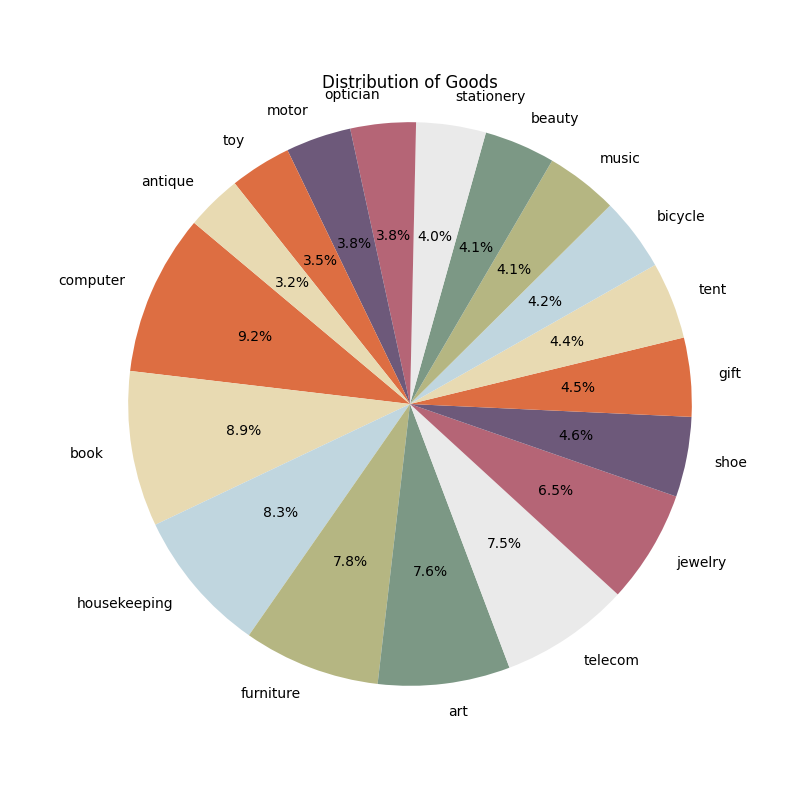

In [151]:
Image(filename='../plots/goods distribution.png')

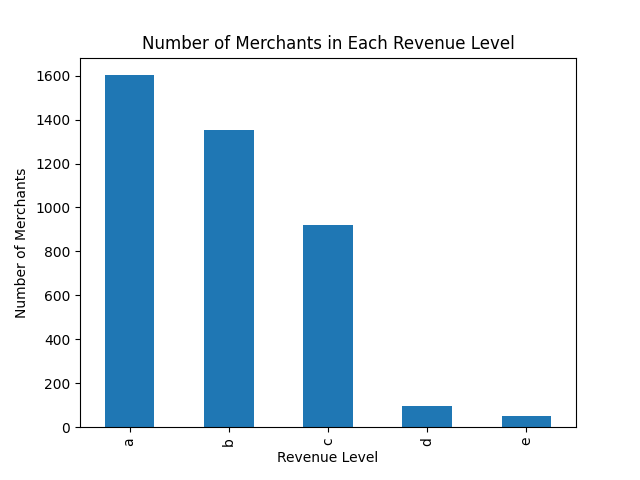

In [152]:
Image(filename='../plots/Number of Merchants in Each Revenue Level.png')

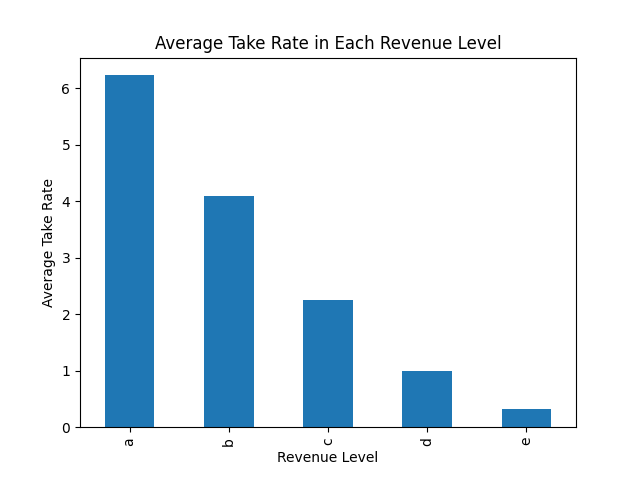

In [153]:
Image(filename='../plots/Average Take Rate in Each Revenue Level.png')

### 1.2 Consumer processing

Get the information of consumer, there are total 499,999 consumer in consumer information df, however, after we merge them with transaction data, we notice only 24,098 consumer made transaction. 

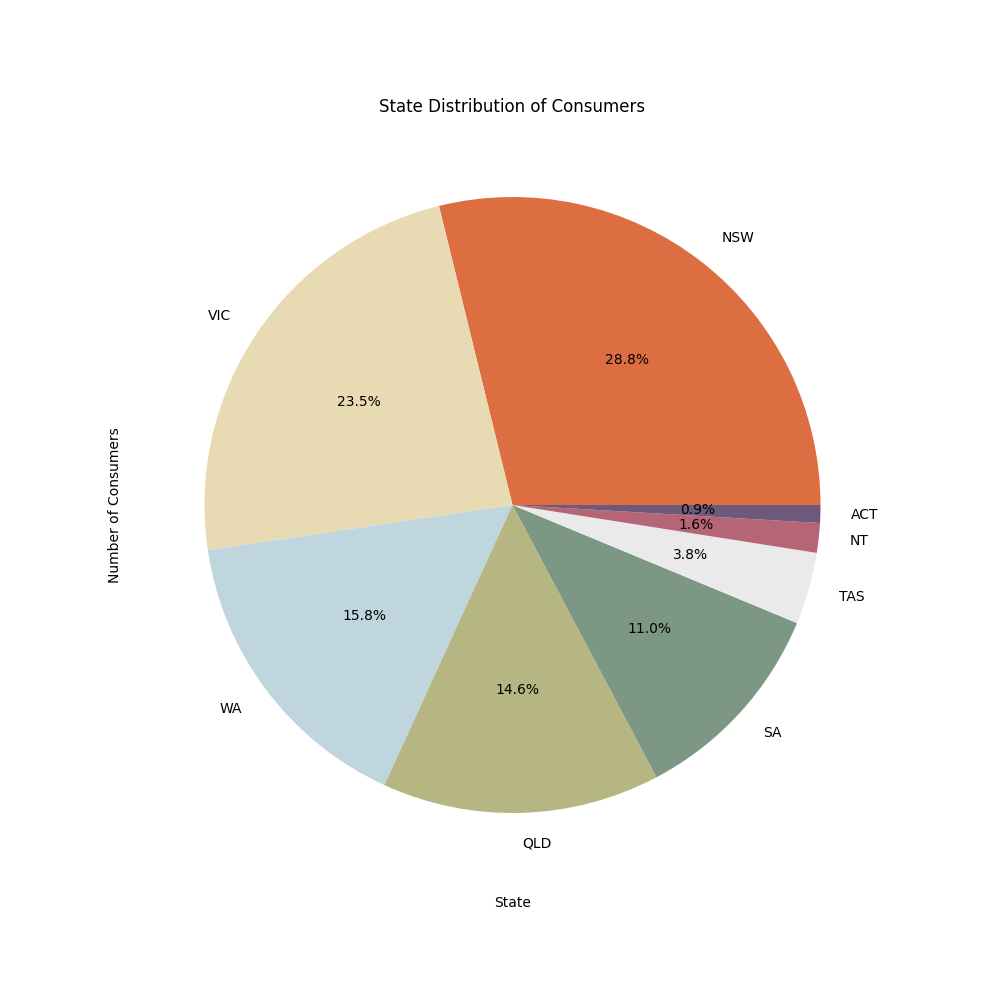

In [154]:
Image(filename='../plots/state distribution of consumers.png')

### 1.3 Transaction processing

1. Merge them into transaction dataset 

2. Remove odd value in transaction, like dollar value < 0.05

3. Remove merchant with small dollar amount of transaction 

4. Remove merchant with small transaction count

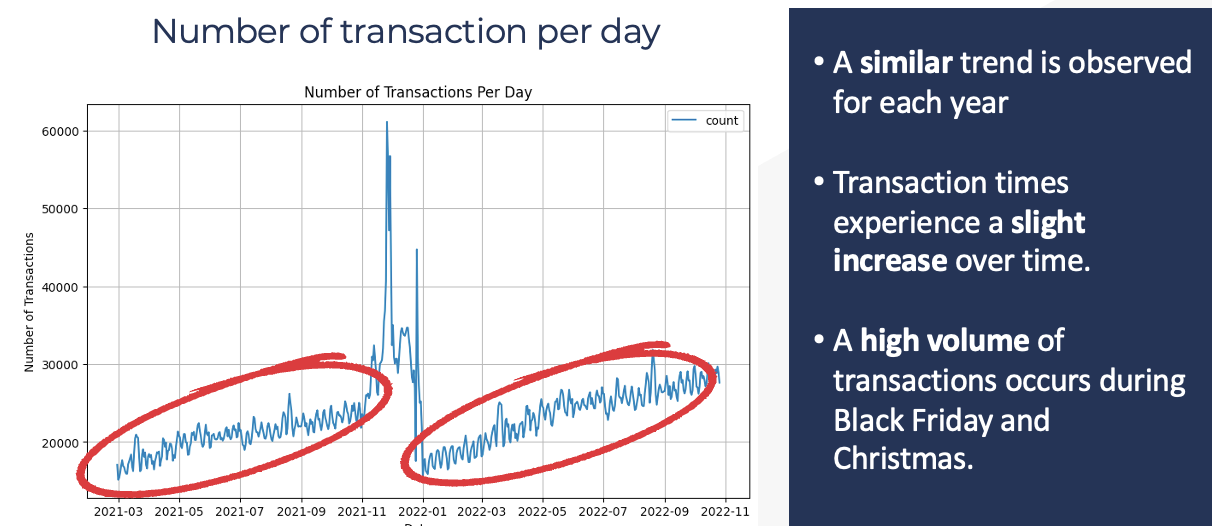

In [155]:
Image(filename='../plots/transaction finding.png')

## Step 2: External data processing

1. Preprocess and merge with the geospatial dataset

2. draw geospatial plot

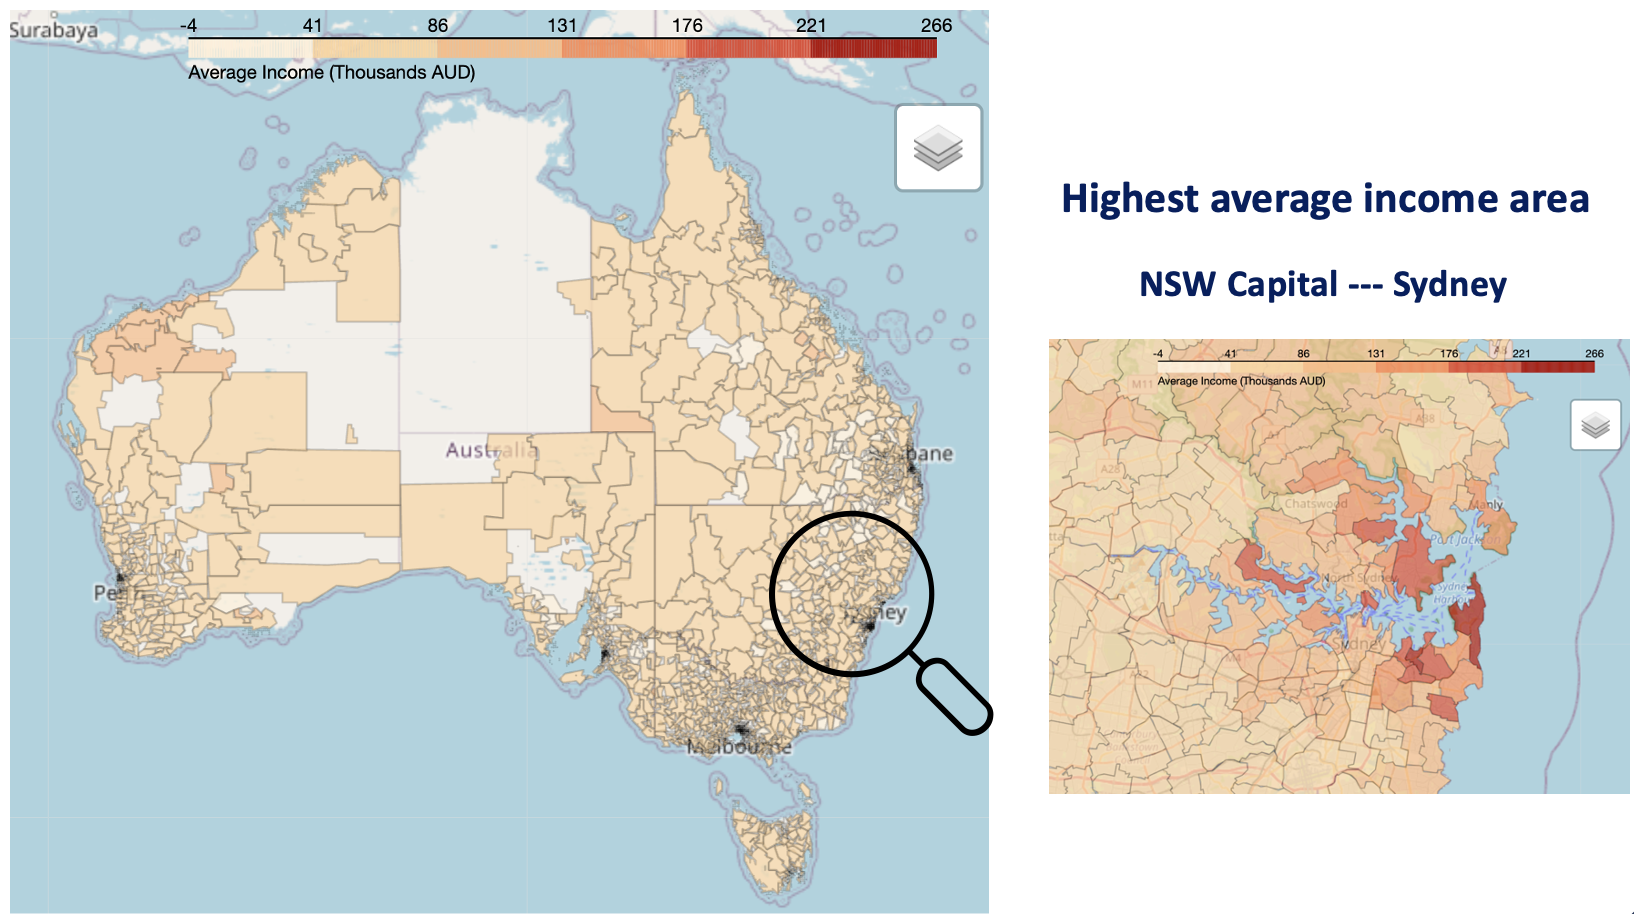

In [156]:
Image(filename='../plots/geospatial.png')

## Step 3: Fraud probability

As the fraud record amount we have is limited in natural, we decided to build models to predict on the whole dataset and use fraud prob as a measurement of safety.

### 3.1 Consumer/transaction fraud

1. Merge and feature seletion

This is the process how we process data:
- For discrete features, one-hot encoding them into numeric.
- For identity info, target encoding is a best way here to encode them. As one-hot encoding will create extremely high dimensions and hard to be processed.

2. Model fitting

As the consumer fraud record we have is very skewed, we decided to separate as 6:2:2 for safe, unsure and fraud. Safe is for better recognizing fraud from safe. The goal is to make fraud prediction 'real': which means if we predict some transactions to fraud, then they should actually be fraud.

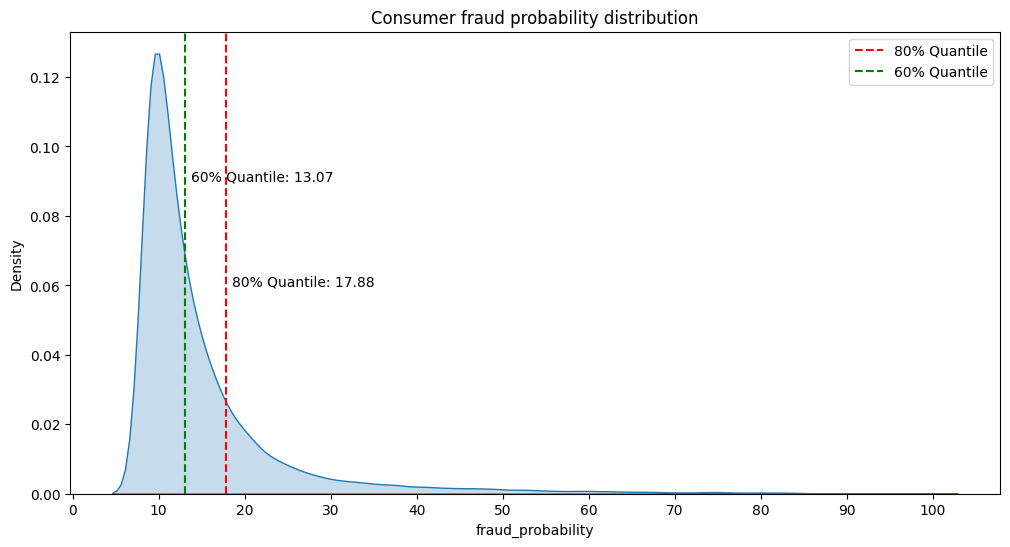

In [157]:
Image(filename='../plots/Consumer fraud data distribution.png')

Here's proof of our goal achieved in the confusion matrix. Lower risk levels are rarely predicted as higher risk levels (unsure or fraud). Also, fraud is seldom recognized as unsure. Although we can't prevent some instances of fraud from being labeled as safe, since safe is dominant, we can still say that, according to our tolerant classification principle, fraud is successfully isolated from the majority.

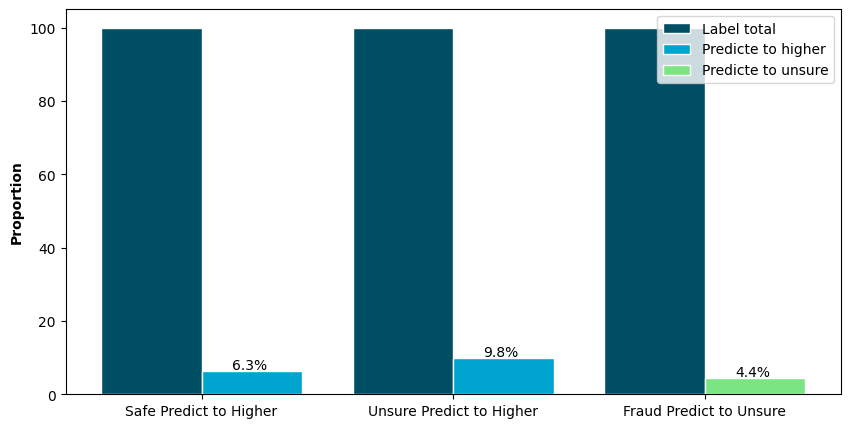

In [158]:
Image(filename='../plots/Consumer fraud prediction analysis.png')

### 3.2 Merchant fraud

Here is the merchant fraud distribution plot

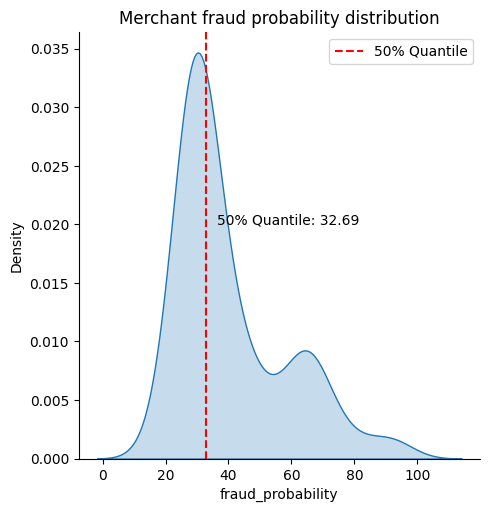

In [159]:
Image(filename='../plots/Merchant fraud data distribution.png')

2-way classification was conducted to achieve a tolerant risk labeling. Only safe or risky!

In [160]:
Image(filename='../plots/Merchant fraud prob confusion matrix.png')

In [161]:
Image(filename='../plots/Merchant risk level.png')

## Step 4: Features prediction 

### 4.1 We create the feature that will be used to predict the important features for year 2023
- total number of consumer
- average dollar value per merchant
- revenue level 
- total revewnue per merchant
- postcode 
- tag



### 4.2 the important features for year 2023 including:

- average dollar value
- number of transaction
- total revenue 
- number of consumer





### 4.3 Then we train the model seperately and use the trained model to predict for next year

- For consumer number, we use **linear regression** model with a trained R-squared (R2) Score: **0.9998**
- For total revenue, we use **random forest regression** with a trained R-squared (R2) Score: **0.97**
- For total transaction, we use **xgboost model** with R-squared (R2) Score: **0.97**
- For average dollar value, we use **random forest** regression with R-squared (R2) Score: **0.88**

## Step 5: Rank model - **LambdaMART model** 

Features:
- For merchant itself:
    - revenue level
- For consumer shop at that merchant
    - the average income for the most frequent postcode for each merchant
    - number of consumer
    - proportion of gender (test to be unuseful)
- For transaction take place at that merchant
    - total num of transaction
    - average dollar value

Target:
- total revenue (in rank)

Weight:
- fraud prob (both consumer and merchant)

### 5.1 modeling

Photo below shows the section of our model which present decision making process 

In [162]:
Image(filename='../plots/Sample tree.png')

feature importance of our model 

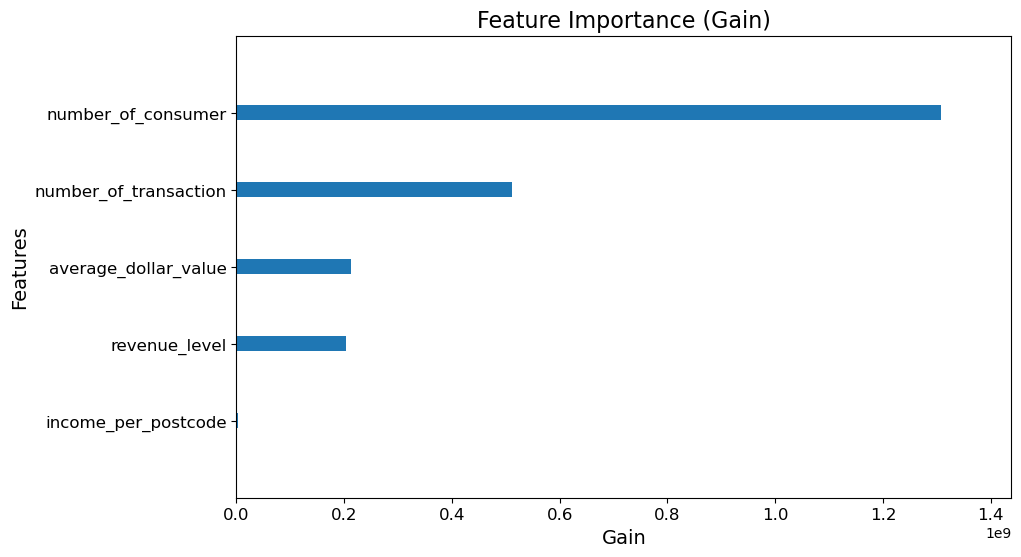

In [163]:
Image(filename='../plots/tree feature importance.png')

Here is how well our model fit compare to the real rank for each merchant, we can see the fluctuation mainly concentrated at the middle part, which is rank from 500 to 2500, which means our model will act pretty well on finding the top hunfred merchants. Also, the fluctuation may be caused by the weight added on each merchants, since our model will consider the fraud proability when generating the rank.

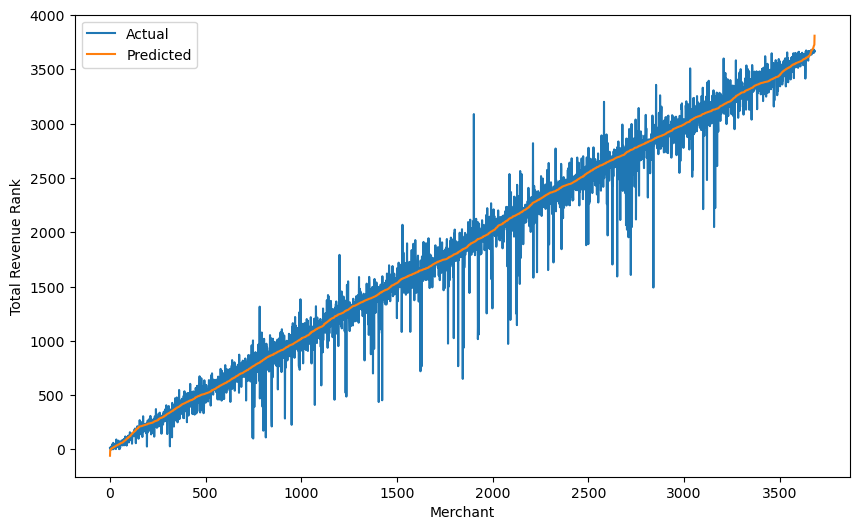

In [164]:
Image(filename='../plots/model performance plot.png')

### 5.2 Top 100 merchants

1. Get the top100 merchant for this year

In [165]:
top_100 = pd.read_csv('../data/final result/top_100_last_year.csv')
top_100

Unnamed: 0  Merchant_ABN        segment  postcode  Actual   Predicted  \
0            1   38700038932      specialty      2604       5  -30.347292   
1            2   82368304209      technical      3005      11  -13.454008   
2            3   58454491168      technical      6507      30   -7.532960   
3            4   96680767841      specialty      5606       7   -2.575268   
4            5   79827781481      lifestyle      3194       1   -1.966951   
..         ...           ...            ...       ...     ...         ...   
95          96   64203420245      specialty      1819      79  101.763180   
96          97   24852446429      lifestyle      6470      65  102.200770   
97          98   13812221471  entertainment      4815     128  102.719666   
98          99   43127814599      lifestyle      7017      93  103.836494   
99         100   62607401721      specialty      2278      94  104.282090   

    Predicted_rank  
0                1  
1                2  
2                3  
3                4  
4                5  
..             ...  
95              95  
96              96  
97              97  
98              98  
99              99  

[100 rows x 7 columns]

2. get the top100 merchant for next year

In [166]:
top_100_this_year = pd.read_csv('../data/final result/ranking_next_year.csv')
top_100_this_year.head(100)

Unnamed: 0  Merchant_ABN        segment  postcode   Predicted  \
0            1   24015576448      specialty      6991  -82.843260   
1            2   12771097467      specialty      2112  -56.463970   
2            3   38700038932      specialty      2604  -55.871723   
3            4   96680767841      specialty      5606  -12.147313   
4            5   79827781481      lifestyle      3194   -9.547556   
..         ...           ...            ...       ...         ...   
95          96   18158387243      lifestyle      6083  112.656120   
96          97   36066395091      lifestyle      3689  113.827934   
97          98   63817709749  entertainment      5641  114.070050   
98          99   90173050473      lifestyle      2336  114.546380   
99         100   41271931352      technical      1819  117.117230   

    Predicted_rank_next  
0                     1  
1                     2  
2                     3  
3                     4  
4                     5  
..                  ...  
95                   94  
96                   95  
97                   96  
98                   97  
99                   98  

[100 rows x 6 columns]

## Step 6: Results

### 6.1 Segments

We can see Lifestyle consist the most top hundred merchants among all the segments, this is mainly because of lifestyle consists the most amount of merchants, and the number of transaction is high since they sell daily goods.

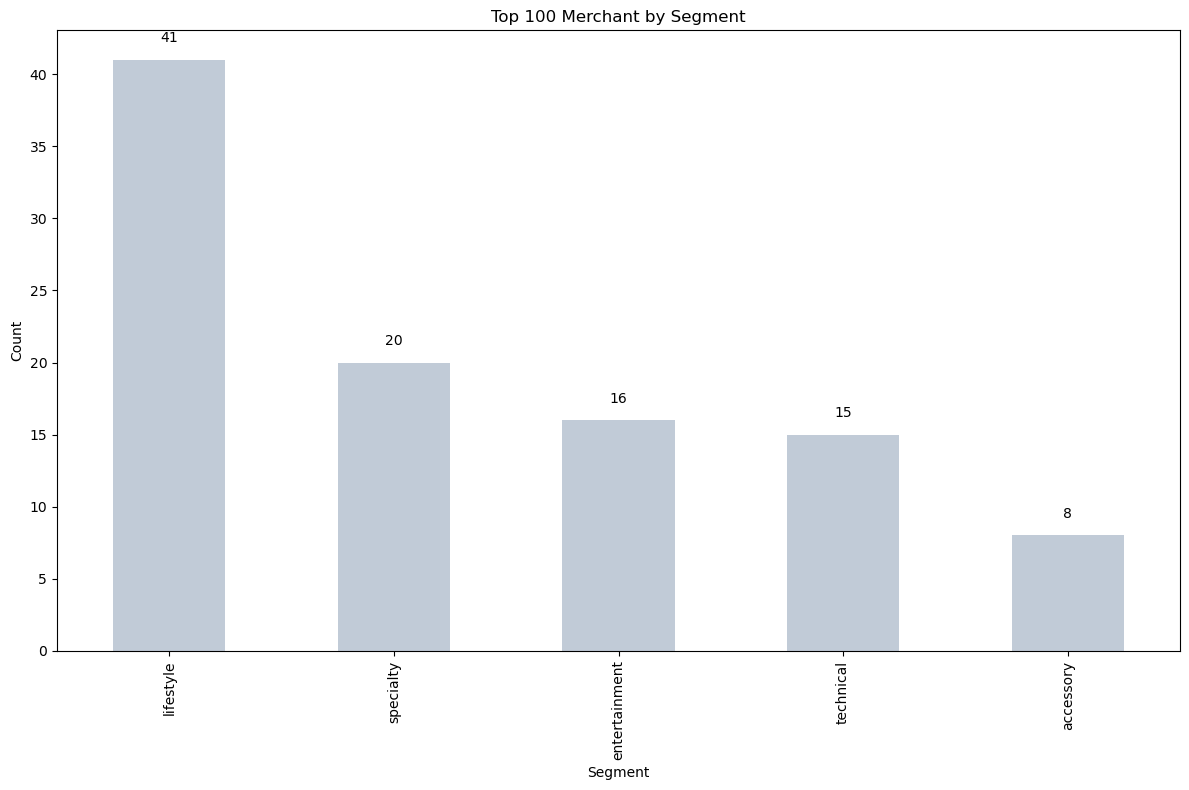

In [167]:
Image(filename='../plots/top 100 merchant by segment.png')

### 6.2 Tags

We can see tag of computer consist the most amount of merchants among the top 100 merchants, and since computer is expensive and has a long using period, we recommend bnpl company to focus on merchants tagged as computer.

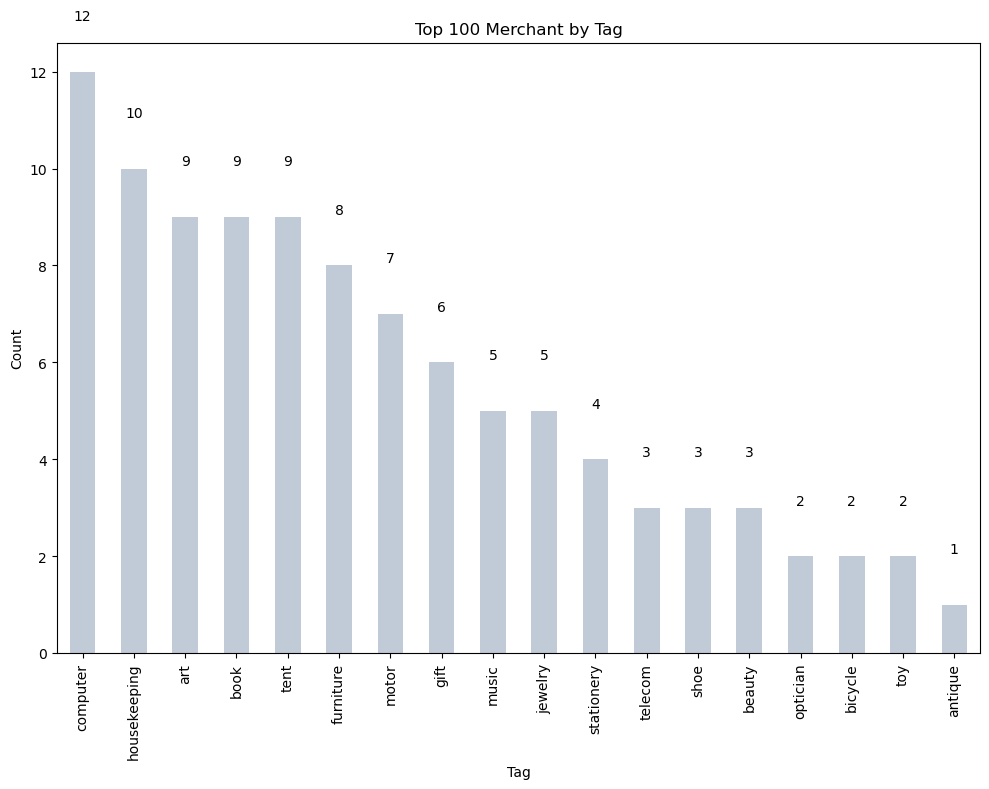

In [168]:
Image(filename='../plots/top 100 merchant by tag.png')

### 6.3 Check for the trend by comparing rank for previous year and this year

We can see there is an extreme increasing trend in technical area, and a decreasing trend in accessary and lifestyle, so we recommend you to focus more on technical merchants and less on accessary and lifestyle. This coincidentally support our recommendation on merchants tagged with computer.

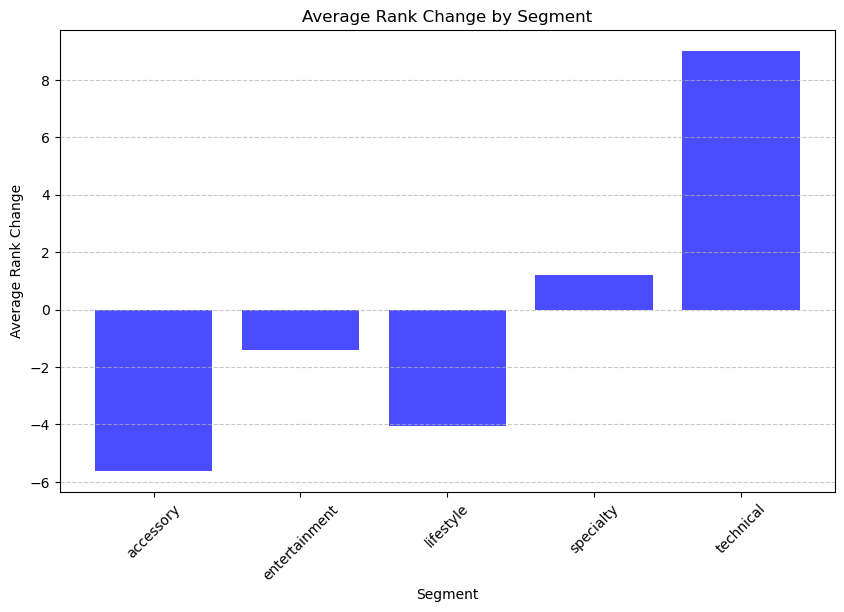

In [169]:
Image(filename='../plots/Rank change by segement.png')

### 6.4 Average total revenue for each segment with top 100 and with all merchants

We can see there is a more then 10 times increase in average total revenue owned by bnpl company if you try to build partnership with the top 100 merchants generated by our ranking model instead of with all the merchants. Which means our model can significantly enhance your profitability.

In [170]:
Image(filename='../plots/average total revenuew by segment.png')

## Step 7: Limitations, assumptions and improvement 

### 7.1 Limitation

**Insufficient Dataset**: 
- Merchant: location information not contain 
- Consumer: only 4% consumer make purchase
- Transaction: Limited range from February 28, 2021 to October 26, 2022.
- Fraud: Lack insight into definition behind fraud dataset, leading to subjective utilization and interpretation.

**Missing SA2 Code:** 2  Postcodes out 3167 postcodes do not have corresponding SA2.

### 7.2 Aussmptions 

1. Consumer Fraud Probability: 
    - Merchant Fraud Probability: Daily record for one merchant represent its fraud feature throughout a year.
    - Consumer shopping behavior: Ignorable amount of cross-state consumption.
2. Each transaction has its own fraud probability.
3. Daily record for one consumer represents all transactions fraud he/she makes in the day.


### 7.3 improvement 

**If we have more time**: 
- Would require extra security features.
- Would involve deeper analysis of external data and noise detection.
- Design a webpage to present the final prediction results in a more intuitive way.

In [171]:
Image(filename='../plots/Log templet.png')

In [172]:
Image(filename='../plots/dashboard templet.png')

## Step 8: Business benefit 

Through the development of our ranking system, we have created a win-win situation for these three parties. 
- **Consumer persepective**: It offers consumers flexible payment options, allowing them to pay in 5 instalments and bring them convenience. 
- **Merchants perspective**: It helps to boost their sales as customers no longer needed to postpone their purchases due to budget constraints. It also improves the competitiveness for each merchant. 
- **BNPL perspective**: Our ranking system ensures that our partnerships with top merchants are not just profitable but also secure. The brand visibility and reputation of the BNPL company can also be improved.

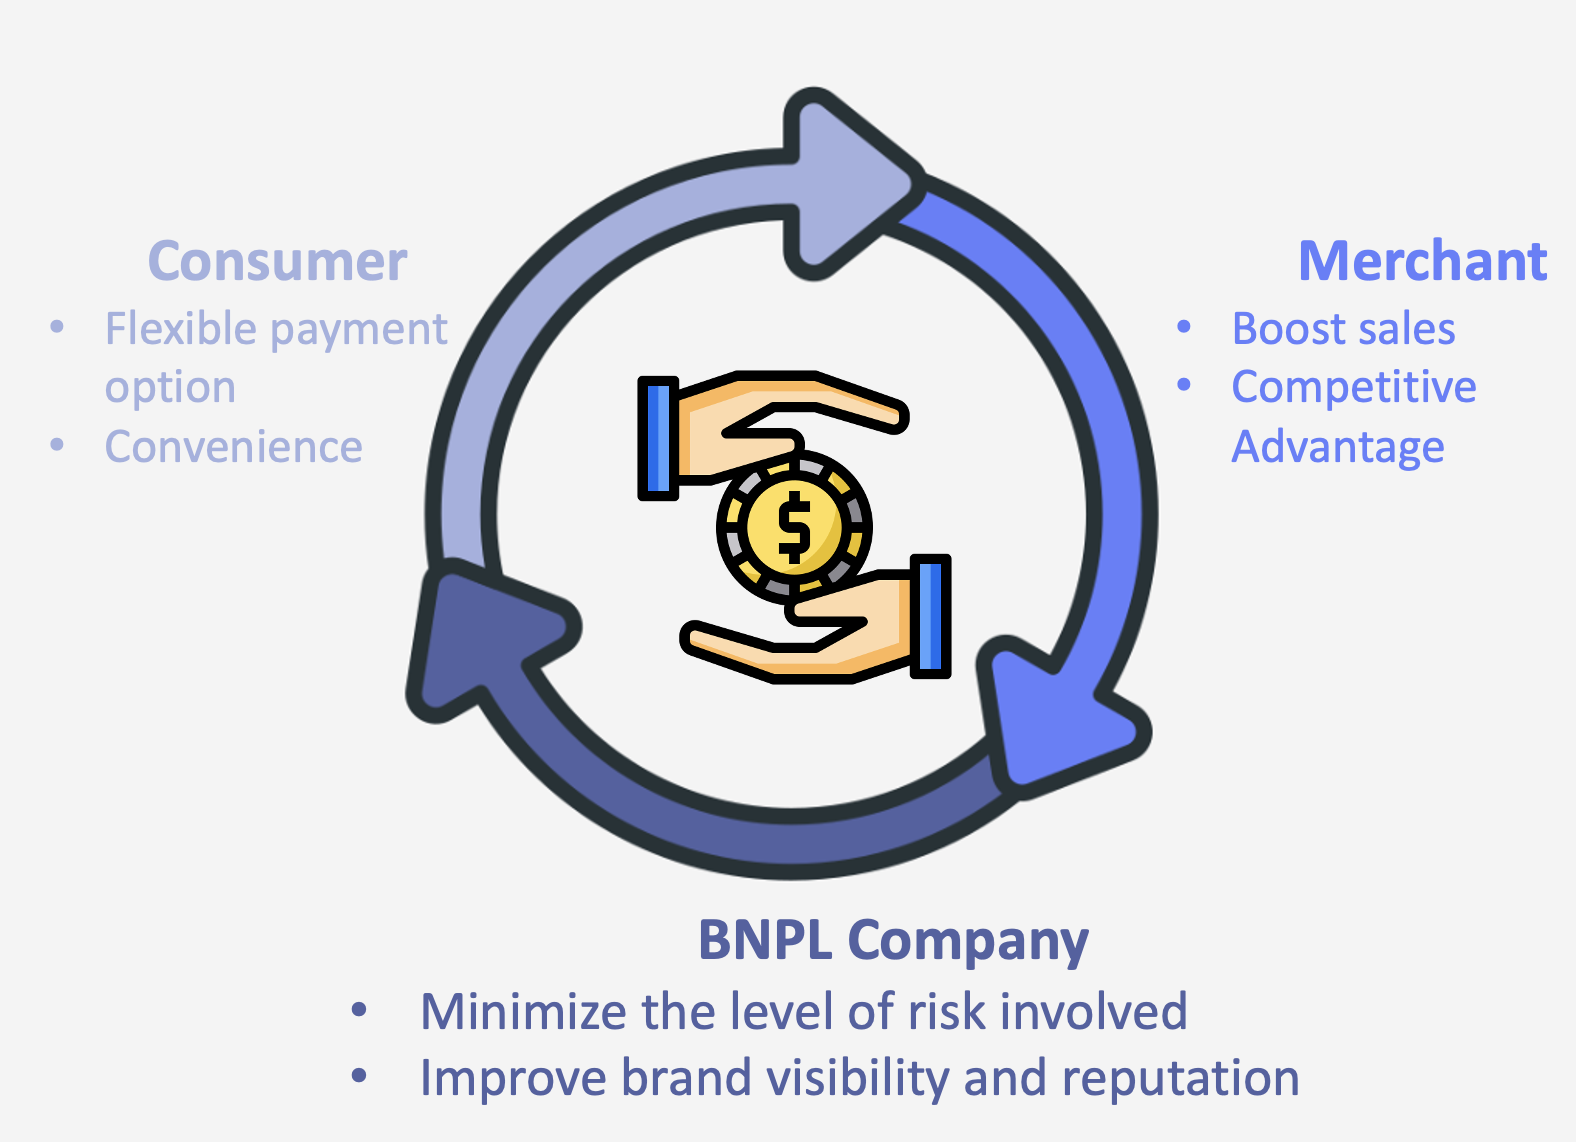

In [173]:
Image(filename='../plots/Business benefit.png')